In [185]:
import os, sys
import numpy as np
import pickle as pkl
import sklearn.metrics.pairwise as sklearn_pairwise
import matplotlib.pyplot as plt
import time
from nltk.metrics.segmentation import pk

['energa_20170905_1549_667406618_1605']


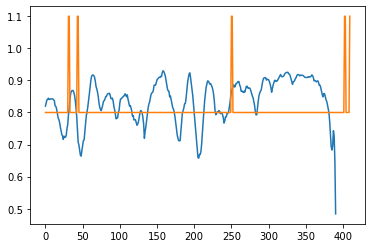

['energa_20170905_1546_512780105_1436']


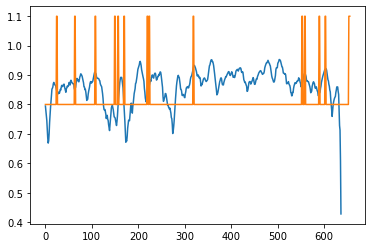

['energa_20170905_1619_600453496_1466']


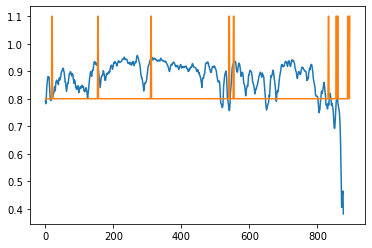

['energa_20170905_1552_552726084_1462']


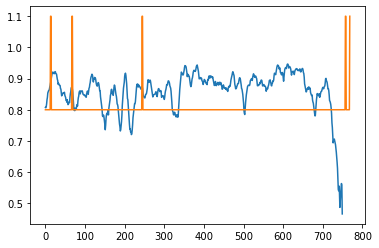

['energa_20170905_1550_586616323_1458']


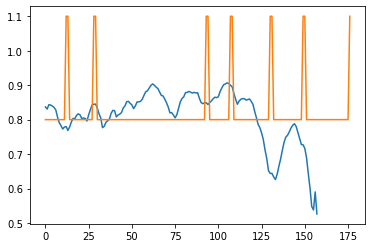

['energa_20170905_1550_501259709_1433']


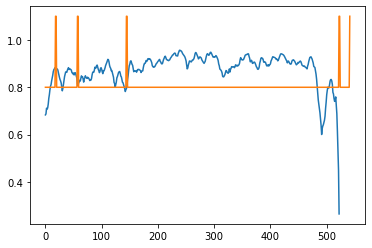

['energa_20170905_1617_535402784_1465']


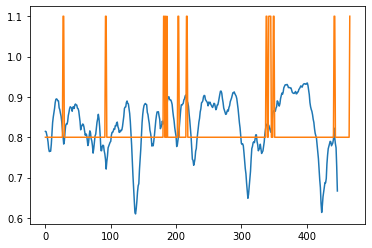

['energa_20170905_1600_609806406_1416']


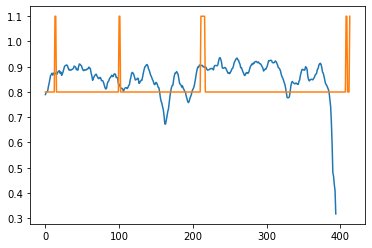

['energa_20170905_1555_604532704_1456']


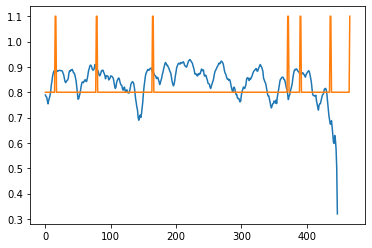

['energa_20170905_1545_586642326_1405']


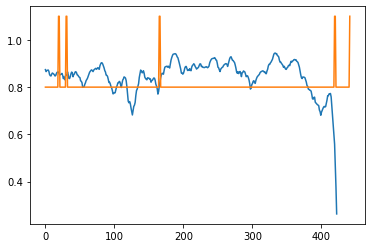

['energa_20170905_1541_669162809_1461']


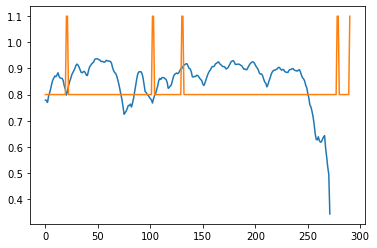

['energa_20170905_1556_632766071_1463']


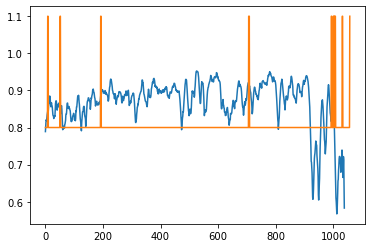

['energa_20170905_1547_508275696_1458']


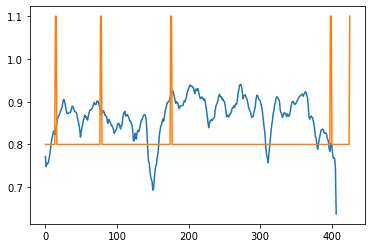

['energa_20170905_1657_502443232_1480']


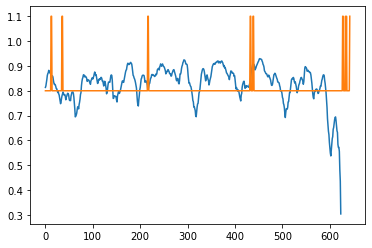

['energa_20170905_1558_721780400_1435']


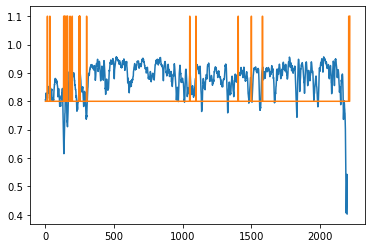

['energa_20170905_1545_884384936_1443']


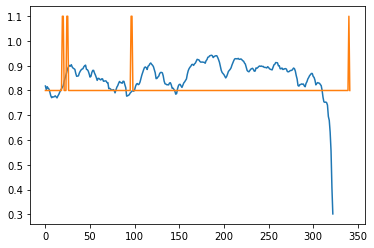

In [186]:
results_pkl = '/dih4/dih4_2/jhu/Raghu/topic_seg_expts/TrueCasing_CV_1_LabelScheme_Segmentation_text_model_truecasing_punctuation_Morethan2TasksArch_longformer_tokenclassif_BERT_loss_wts_1_0_Epochs_50_bert-base-polish-cased-v1_energa_ForI-Scheme_WithSEP_OnlySmoothSegmentation_/truecasing_punctuation_Morethan2TasksArch_longformer_tokenclassif_BERT_TrueCasing_42/results.pkl'
results = pkl.load(open(results_pkl, 'rb'))

last_hidden_state = results['last_layer_outputs_op0']
utt_id = results['utt_id_op0']
window_len = 20
for doc_ind in range(len(last_hidden_state)):
    #dot_products = np.dot(last_hidden_state[doc_ind][0], last_hidden_state[doc_ind][0])
    moving_ave_hidden_states = np.matrix([np.mean(last_hidden_state[doc_ind][i:i+window_len], axis=0) 
                                          for i in range(last_hidden_state[doc_ind].shape[0])])
    
#     dot_products = sklearn_pairwise.cosine_similarity(last_hidden_state[doc_ind], last_hidden_state[doc_ind])
    dot_products = sklearn_pairwise.cosine_similarity(moving_ave_hidden_states, moving_ave_hidden_states)
    upper_diag_elements = [dot_products[i][i+window_len] for i in range(dot_products.shape[0]-window_len)]
    doc_labels = results['true_labels_op0'][doc_ind]
    downsample_doc_labels = ['Boundary' in doc_labels[ind:ind+window_len] for ind in range(len(doc_labels)-window_len)]
    
    change_points = np.array([1*(doc_labels[ind]!=doc_labels[ind+1]) for ind in range(len(doc_labels)-1)])
    
    
    boundary_ind = [ind for ind,i in enumerate(change_points) if i == 1]
#     print(boundary_ind)
#     print(change_points)
    print(utt_id[doc_ind])
    plt.figure()
    plt.plot(upper_diag_elements)
    plt.plot(change_points*0.3+0.8)
    plt.show()
    time.sleep(1)
    
    
    

In [184]:
gt_labels = results['true_labels_op0']


[['I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'Boundary',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'Boundary',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I-',
  'I

In [183]:
doc_labels

['I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'Boundary',
 'I-',
 'I-',
 'I-',
 'I-',
 'Boundary',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'Boundary',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 'I-',
 '

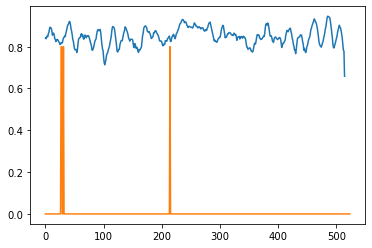

In [133]:

fig, axes = plt.subplots(nrows=2, ncols=1)
                im = axes[0].imshow(GT_labels_matrix.T, origin='lower',  aspect='auto', interpolation='none')
                axes[1].imshow(model_labels_categorical[:utt_len].T, origin='lower',  aspect='auto', interpolation='none')
                axes[0].set_yticks([0, 1, 2, 3, 4])
                axes[0].set_yticklabels(['ang', 'fru', 'hap', 'neu', 'sad'])
                axes[1].set_yticks([0, 1, 2, 3, 4])
                axes[1].set_yticklabels(['ang', 'fru', 'hap', 'neu', 'sad'])
                fig.colorbar(im, ax=axes.ravel().tolist())
                plt.show()

In [131]:
change_points

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [69]:
# results.keys()
# len(results['originalword2subtokens'][0][0])
results['true_labels_op0'][0][220:]

['zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_topic',
 'zgloszenie_szkody_

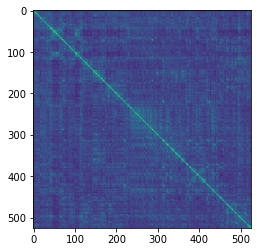

In [100]:
plt.imshow(dot_products)

In [98]:
x= np.matrix([[1,1,1,1,1],[1,1,1,1,1], [2,2,2,2,2], [1,1,1,1,1]])

In [99]:
# np.convolve(x, [1,1,1])
np.ma.average(x, axis=0, weights=[1,1,1], returned=False)

ValueError: Length of weights not compatible with specified axis.

In [95]:
x

matrix([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2]])

In [ ]:
[for i in range()]